<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/linear_regulation_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import random
import numpy as np
import torch

数据集

In [89]:
true_w = [2,-3.4]
true_b = 4.2
num_inputs = 2
num_examples = 1000
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

画图

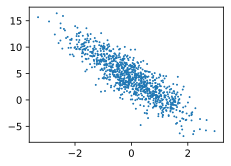

In [90]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figuresize(figuresize=(3.5,2.5)):
  set_svg_figure()
  plt.rcParams['figure.figsize']=figuresize

set_figuresize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

读取数据

In [91]:
def data_iter(batch_size,features,labels):
  num_example = len(features)
  indices = list(range(num_example))
  random.shuffle(indices)
  for i in range(0,num_example,batch_size):
    j = torch.LongTensor(indices[i:min(i+batch_size,num_example)])
    yield features.index_select(0,j),labels.index_select(0,j)

In [92]:
batch_size=10

初始化函数参数

In [93]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float64)
b = torch.zeros(1,dtype=torch.float64)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

定义函数

In [94]:
def linreg(X,w,b):
  return torch.mm(X,w)+b


定义损失函数

In [95]:
def sequare_loss(y_hat,y):
  return (y_hat-y.view(y_hat.size()))**2/2

定义优化算法

In [96]:
def sgd(params,batch_size,lr):
  for param in params:
    param.data -= lr*param.grad/batch_size

进行训练

In [97]:
lr = 0.03
num_epoch = 3
loss = sequare_loss
net = linreg
for epoch in range(num_epoch):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y).sum()
    l.backward()
    sgd([w,b],batch_size,lr)
    w.grad.data.zero_()
    b.grad.data.zero_()
  train_1 = loss(net(features,w,b),labels)
  print('epoch:%d, loss:%f'%(epoch+1,train_1.mean().item()))

print(true_w,'\n',w)
print(true_b,'\n',b)

epoch:1, loss:0.039704
epoch:2, loss:0.000153
epoch:3, loss:0.000053
[2, -3.4] 
 tensor([[ 2.0005],
        [-3.3997]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.2001], dtype=torch.float64, requires_grad=True)
